In [3]:
us = environment.UserSettings()
us['musicxmlPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['musescoreDirectPNGPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['lilypondPath'] = r'C://Music2leadsheet//lilypond-2.24.3//bin//lilypond.exe'

In [ ]:
filename = input().replace("\\" , "/")
print(filename)
os.system(f"demucs -d cpu {filename}")

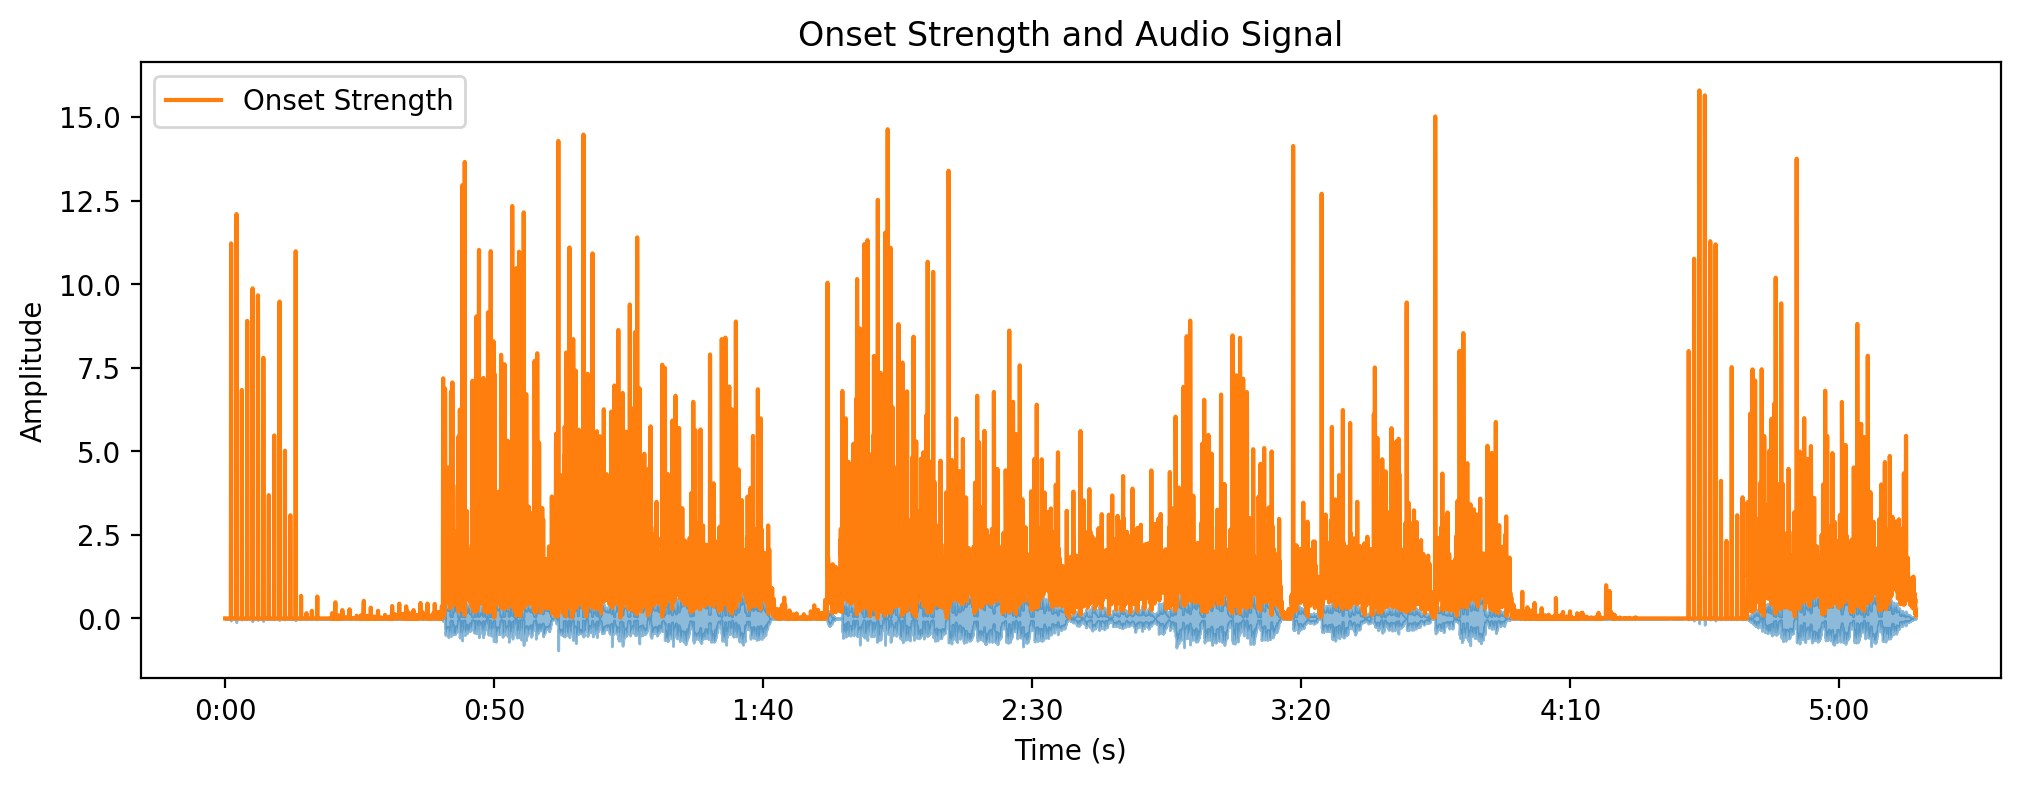

Onset times (in seconds): [  1.09133787   2.08979592   3.11147392   4.10993197   5.08517007
   6.10684807   7.10530612   8.10376417   9.12544218  10.10068027
  11.12235828  12.12081633  13.09605442  40.51882086  40.77424036
  40.86712018  41.23863946  41.42439909  41.49405896  41.74947846
  41.95845805  42.23709751  42.39963719  43.37487528  43.58385488
  43.63029478  44.07147392  44.53587302  44.9538322   45.85941043
  45.9755102   46.20770975  46.27736961  46.6953288   47.15972789
  47.48480726  47.99564626  48.13496599  48.29750567  48.57614512
  48.85478458  49.11020408  49.34240363  49.87646259  50.08544218
  50.24798186  50.85170068  51.26965986  51.47863946  51.91981859
  52.50031746  52.75573696  52.89505669  53.35945578  53.56843537
  53.82385488  54.12571429  54.63655329  54.77587302  55.03129252
  55.17061224  55.47247166  55.93687075  56.2155102   56.40126984
  56.72634921  57.16752834  57.42294785  57.51582766  57.74802721
  58.00344671  58.35174603  58.72326531  58.932244

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = r'C:\Music2leadsheet\separated\htdemucs\ซ่อนกลิน\vocals.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_file)

# Compute onset strength
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# Plot the onset graph
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(librosa.times_like(onset_env), onset_env, label='Onset Strength')
plt.title('Onset Strength and Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the onset list
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
print("Onset times (in seconds):", onset_times)


Interval 1 - Start Time: 1.09s, End Time: 2.09s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 1.00s
---
Interval 2 - Start Time: 2.09s, End Time: 3.11s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 1.02s
---
Interval 3 - Start Time: 3.11s, End Time: 4.11s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 1.00s
---
Interval 4 - Start Time: 4.11s, End Time: 5.09s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 0.98s
---
Interval 5 - Start Time: 5.09s, End Time: 6.11s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 1.02s
---
Interval 6 - Start Time: 6.11s, End Time: 7.11s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 1.00s
---
Interval 7 - Start Time: 7.11s, End Time: 8.10s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 1.00s
---
Interval 8 - Start Time: 8.10s, End Time: 9.13s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 1.02s
---
Interval 9 - Start Time: 9.13s, End Time: 10.10s
Max Frequency: 0.00 Hz, Closest Note: A3
Duration: 0.98s
---
Interval 10 - Star

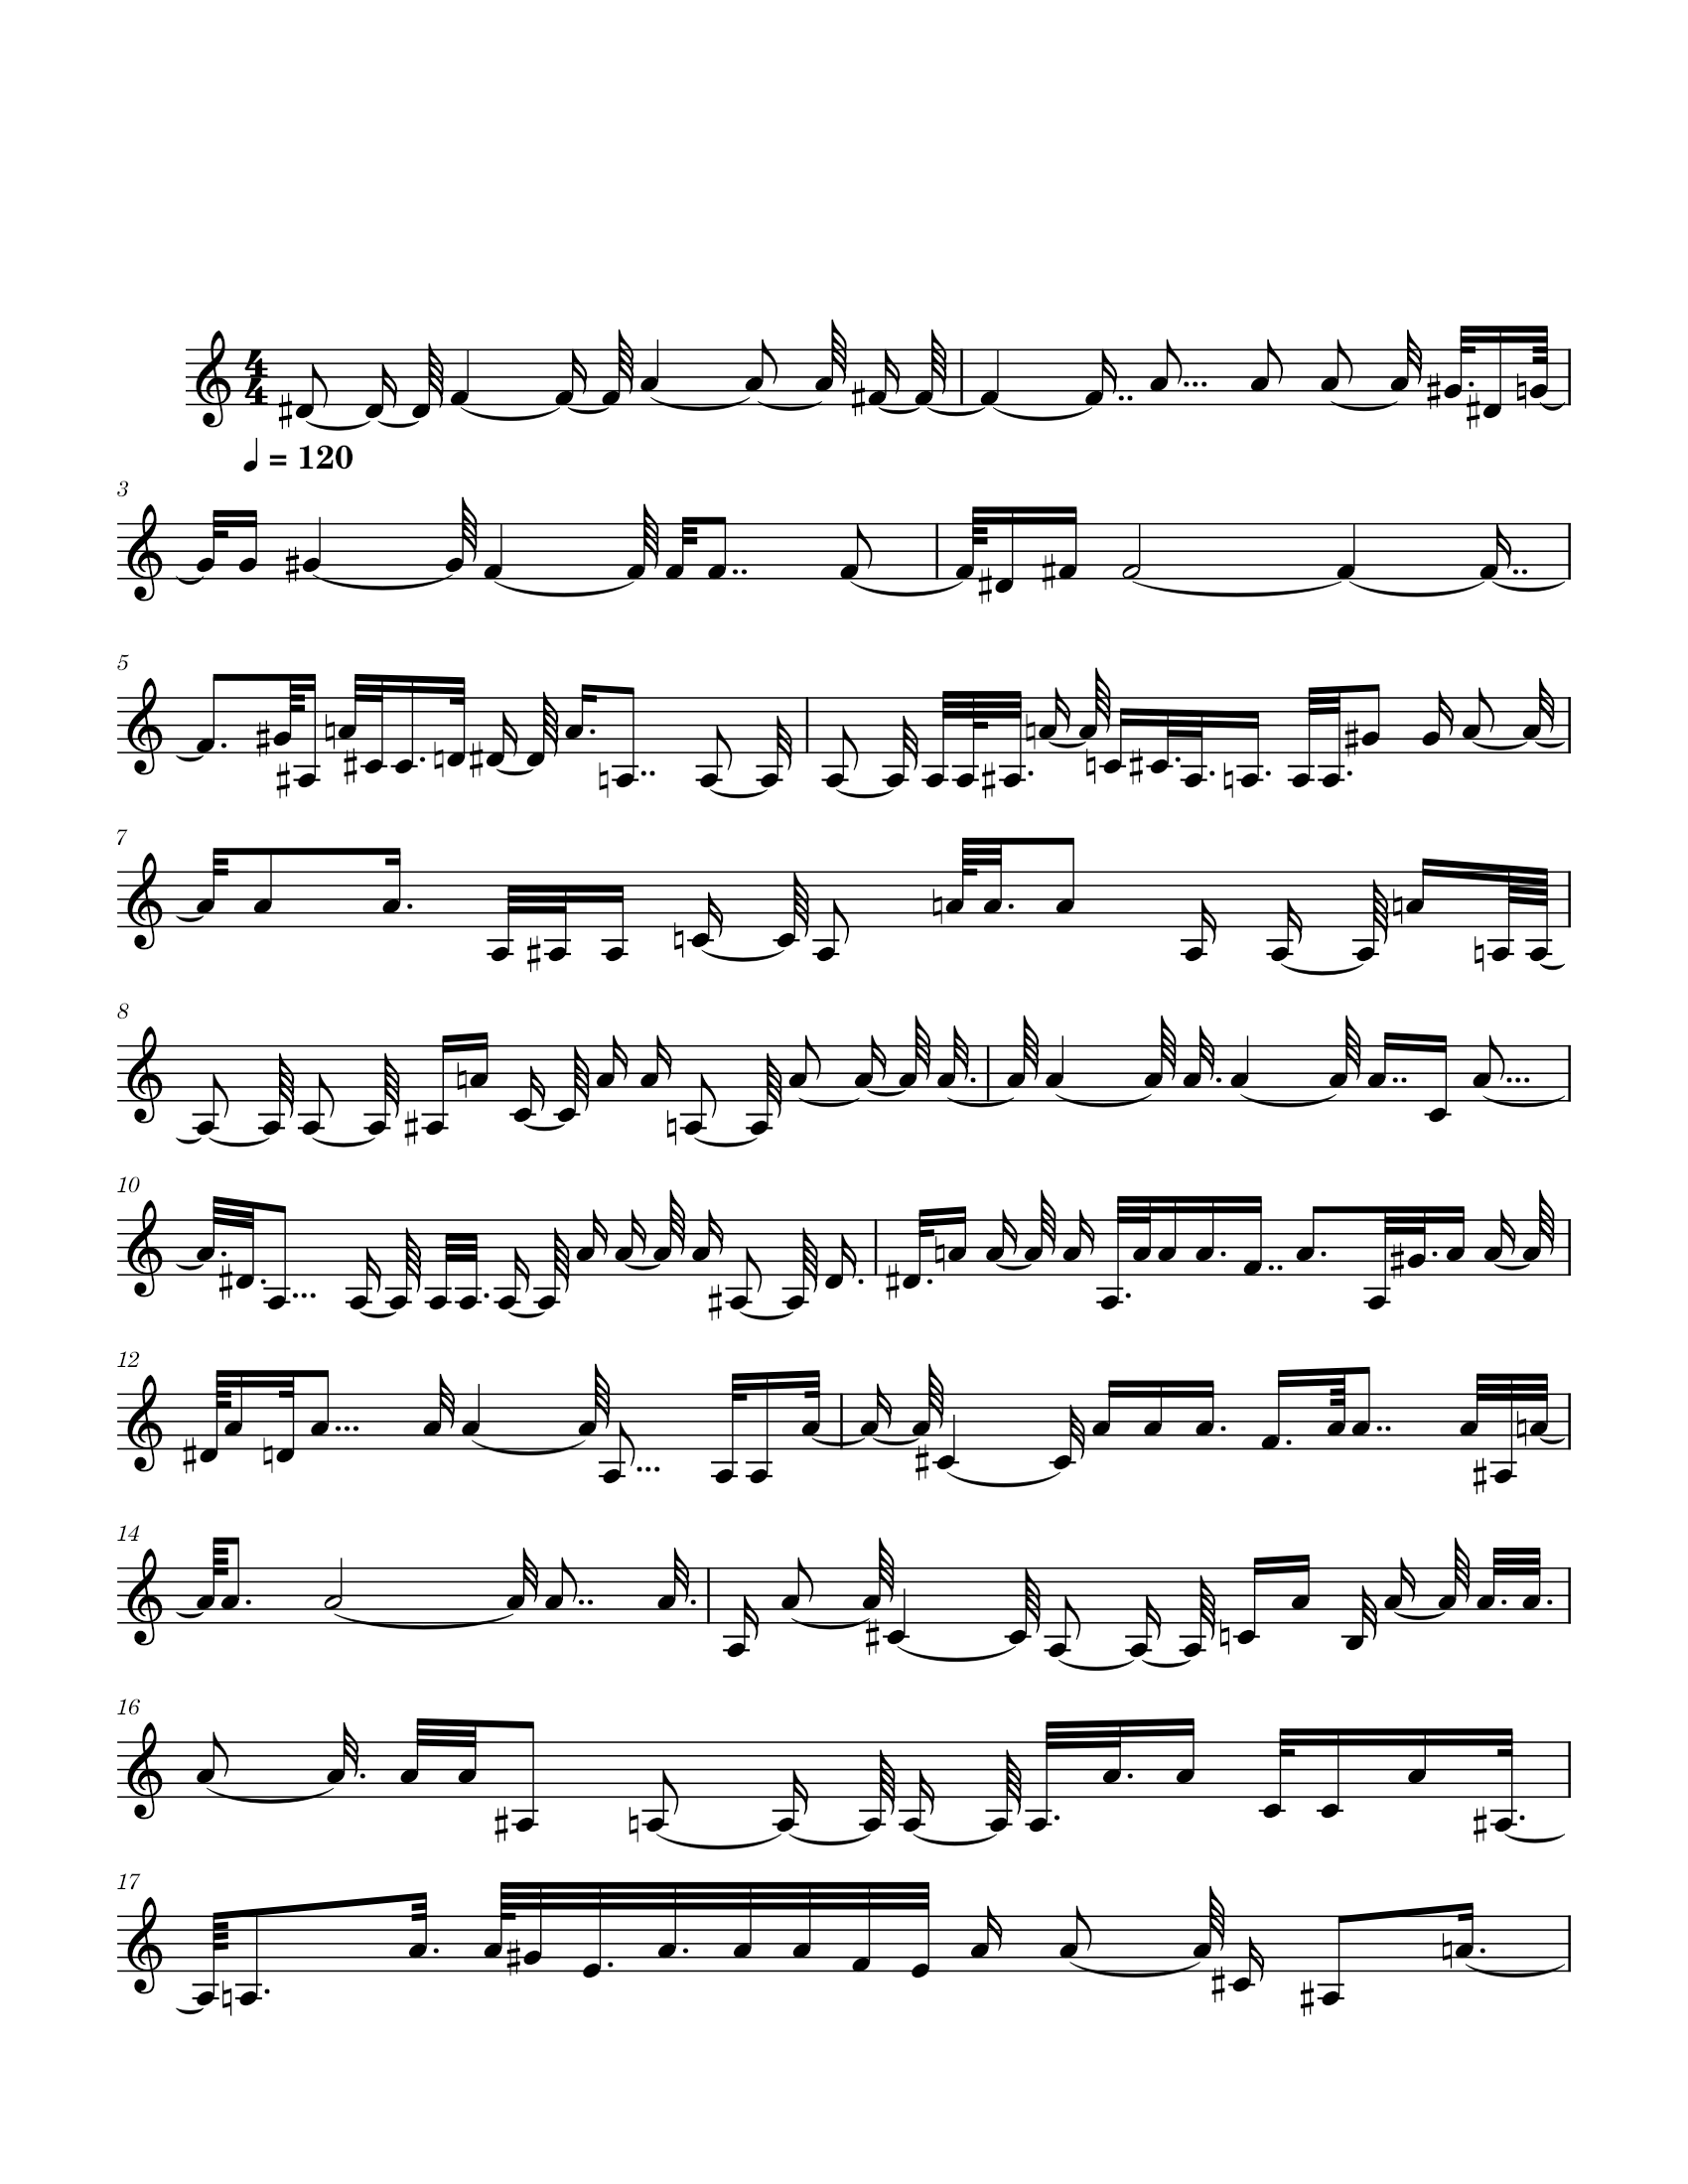

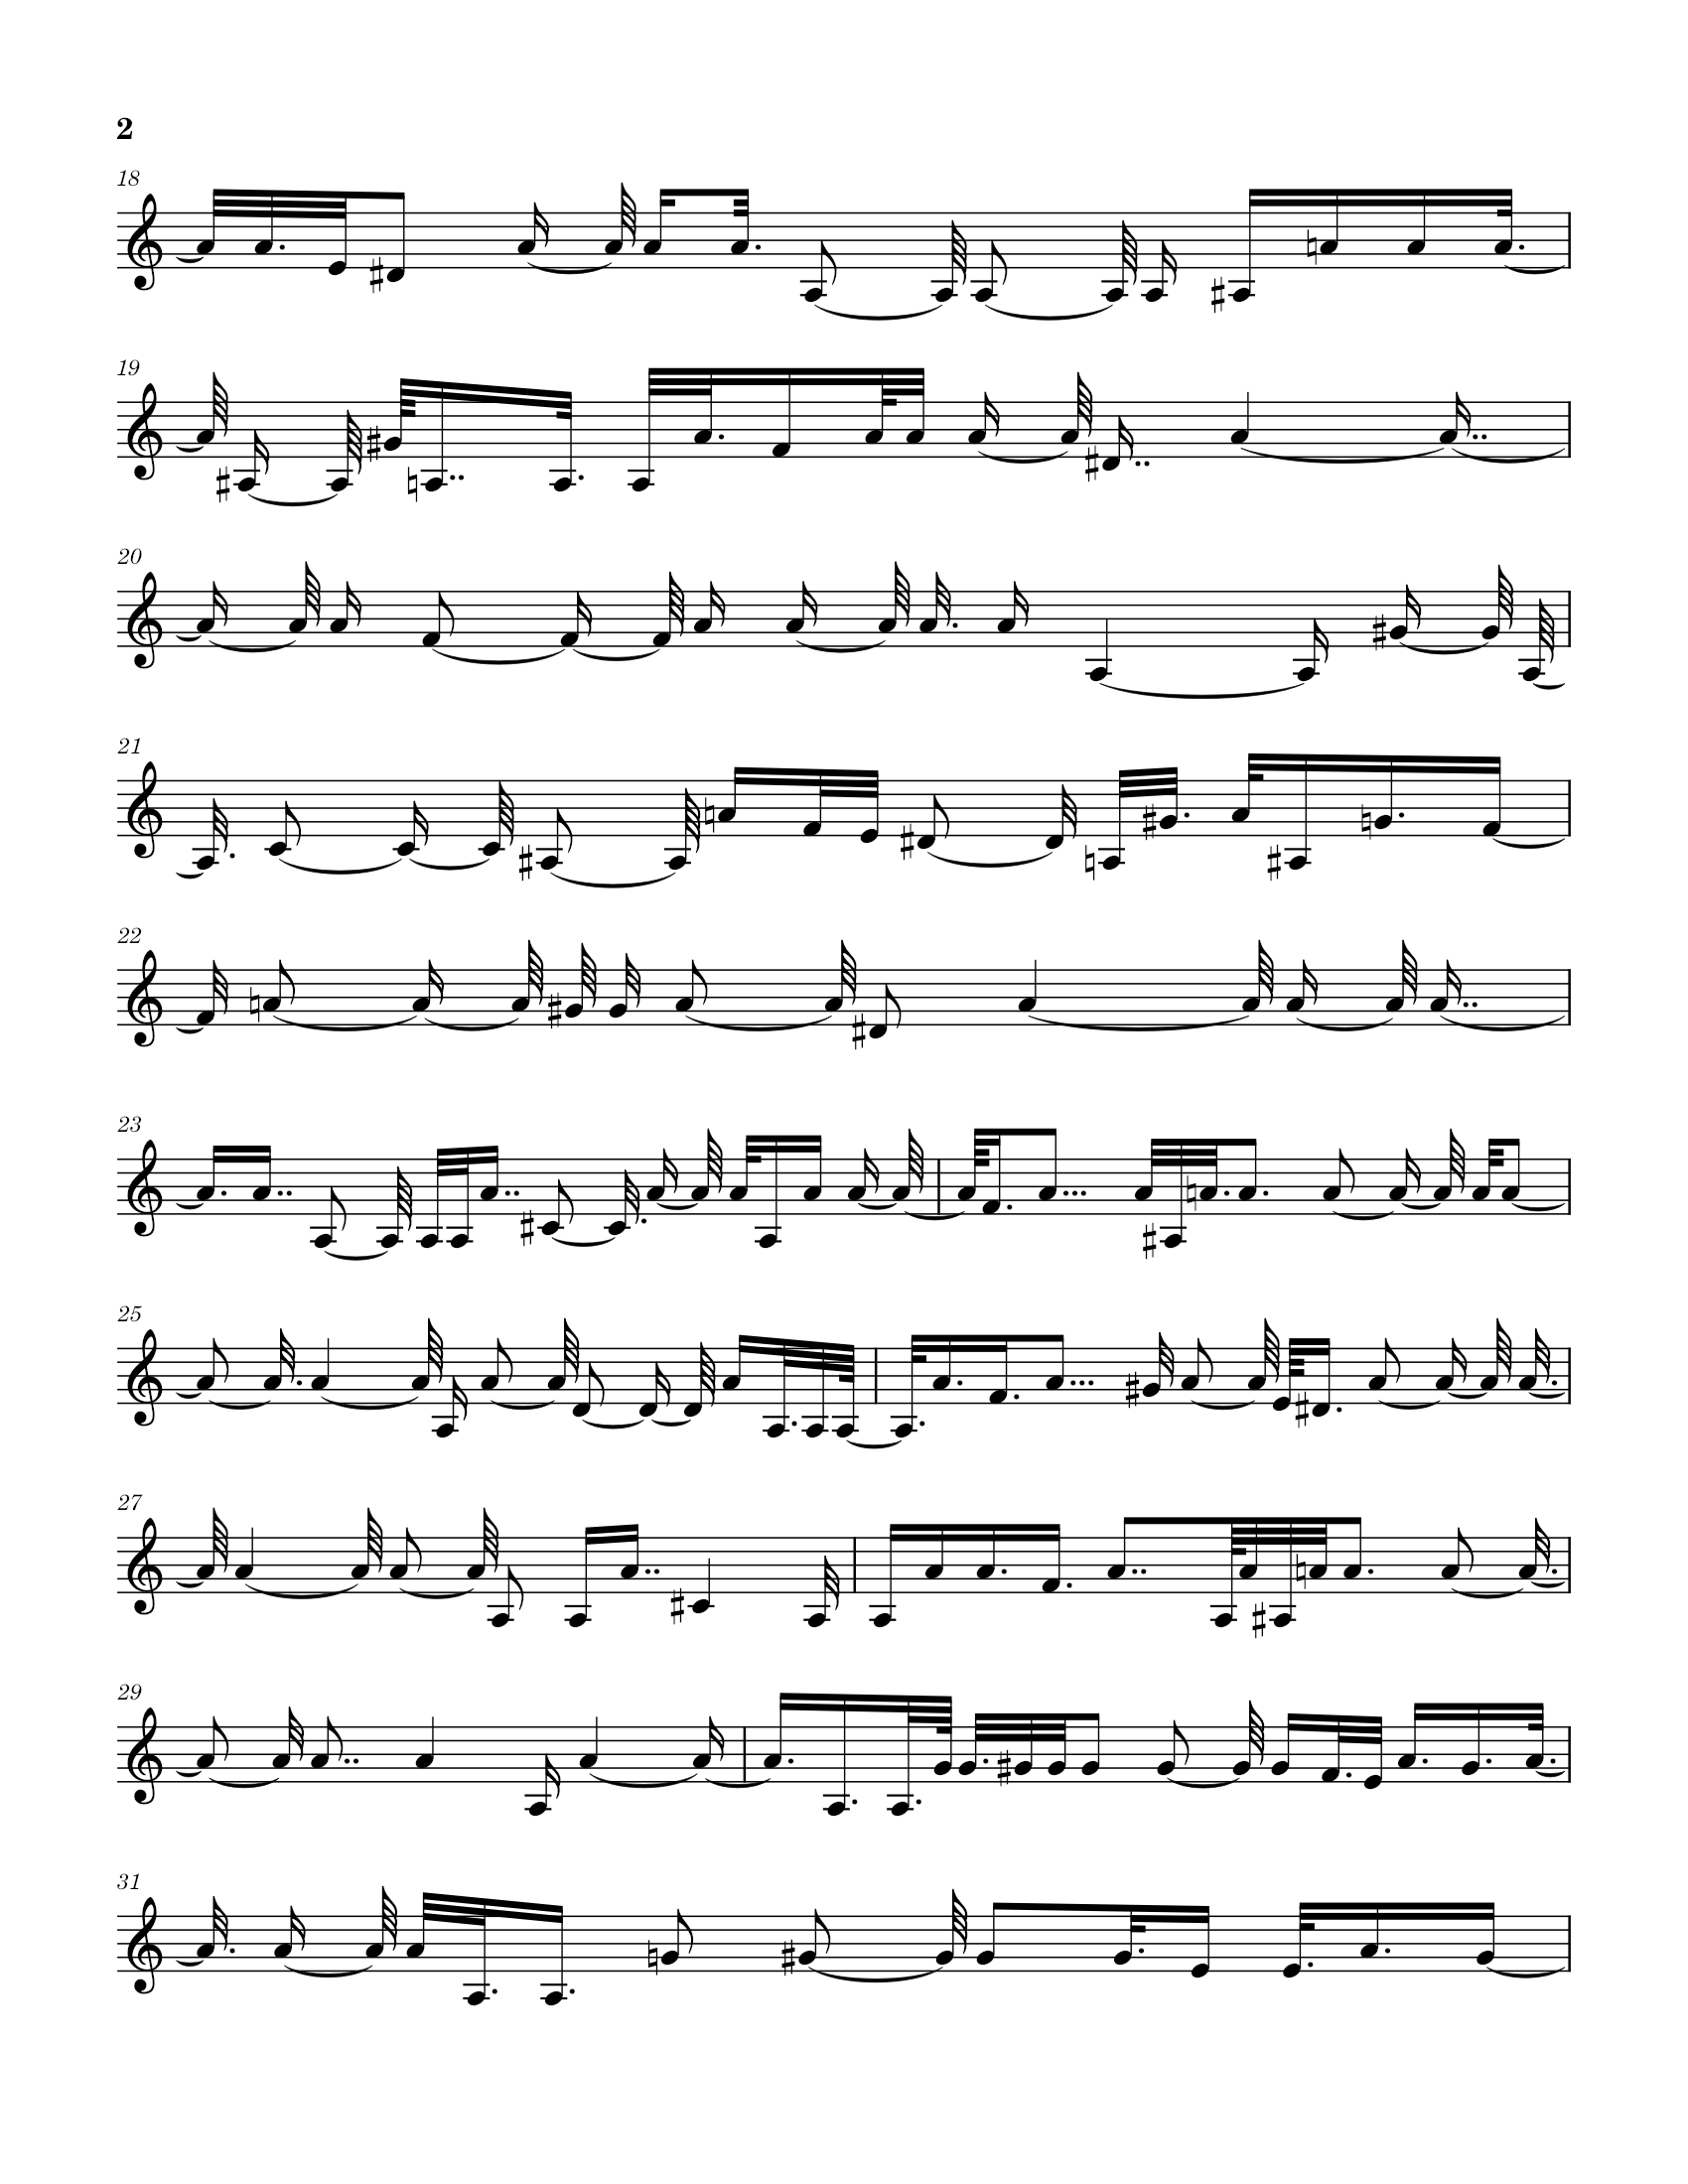

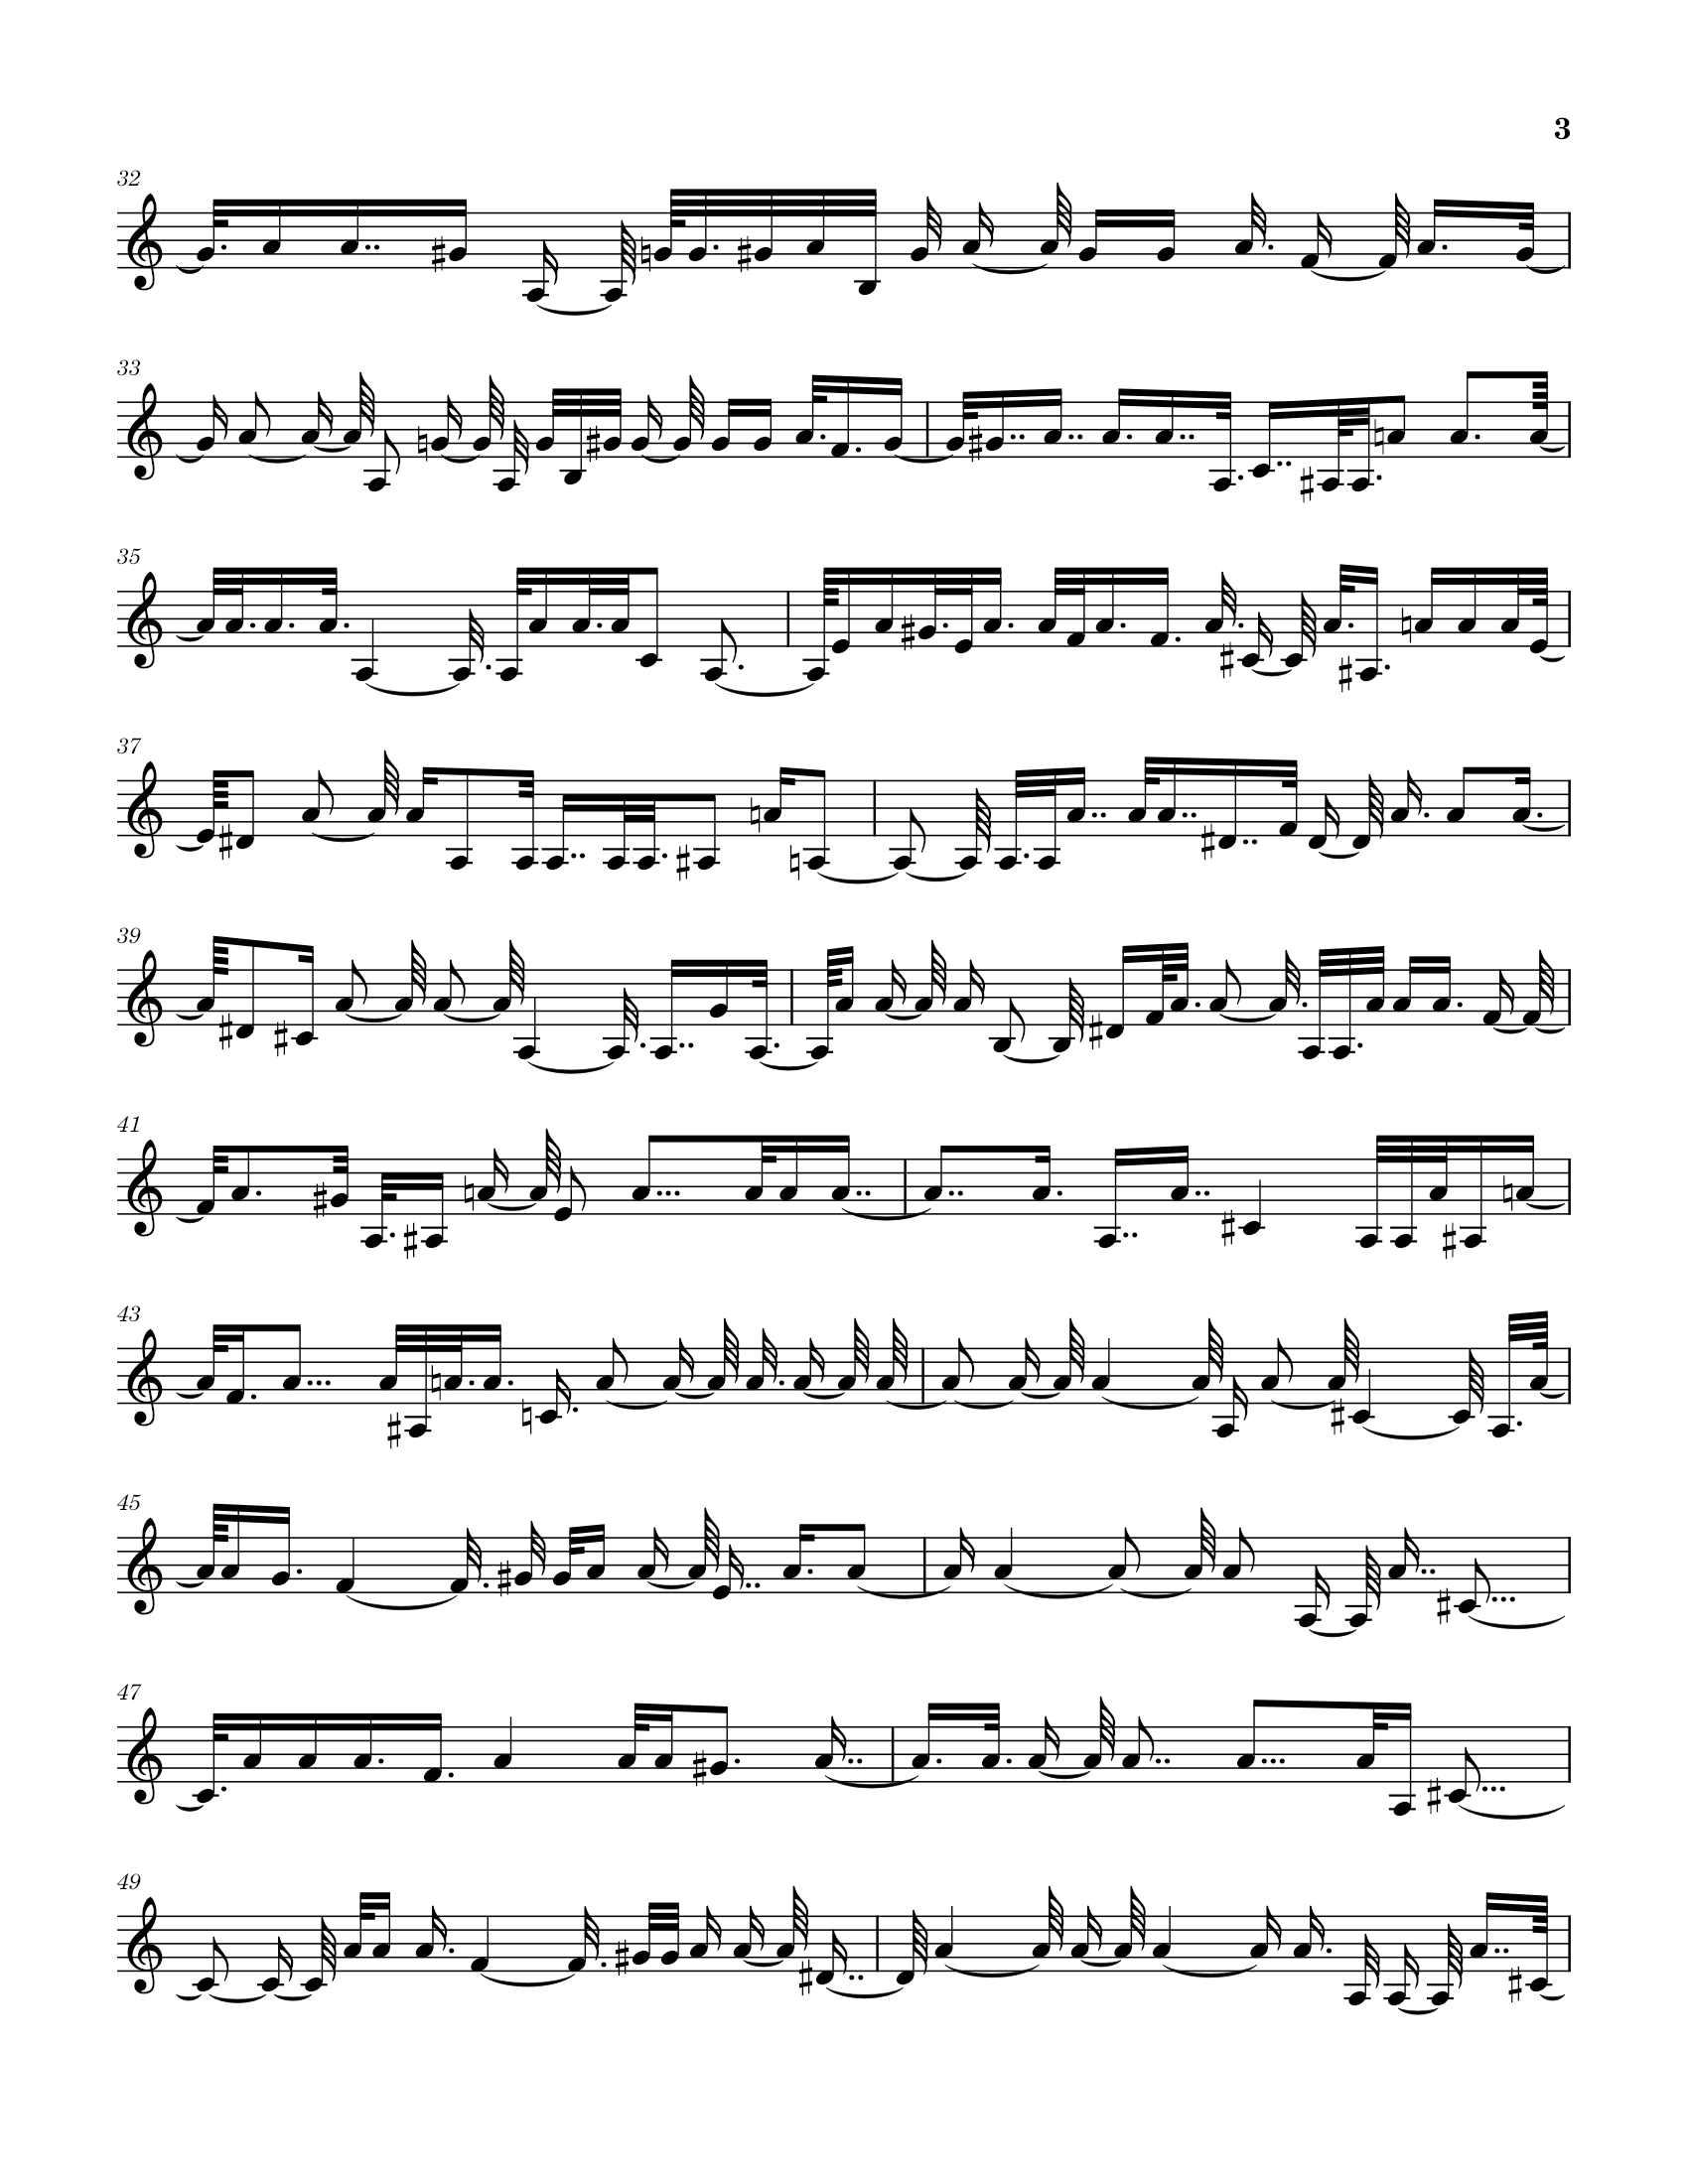

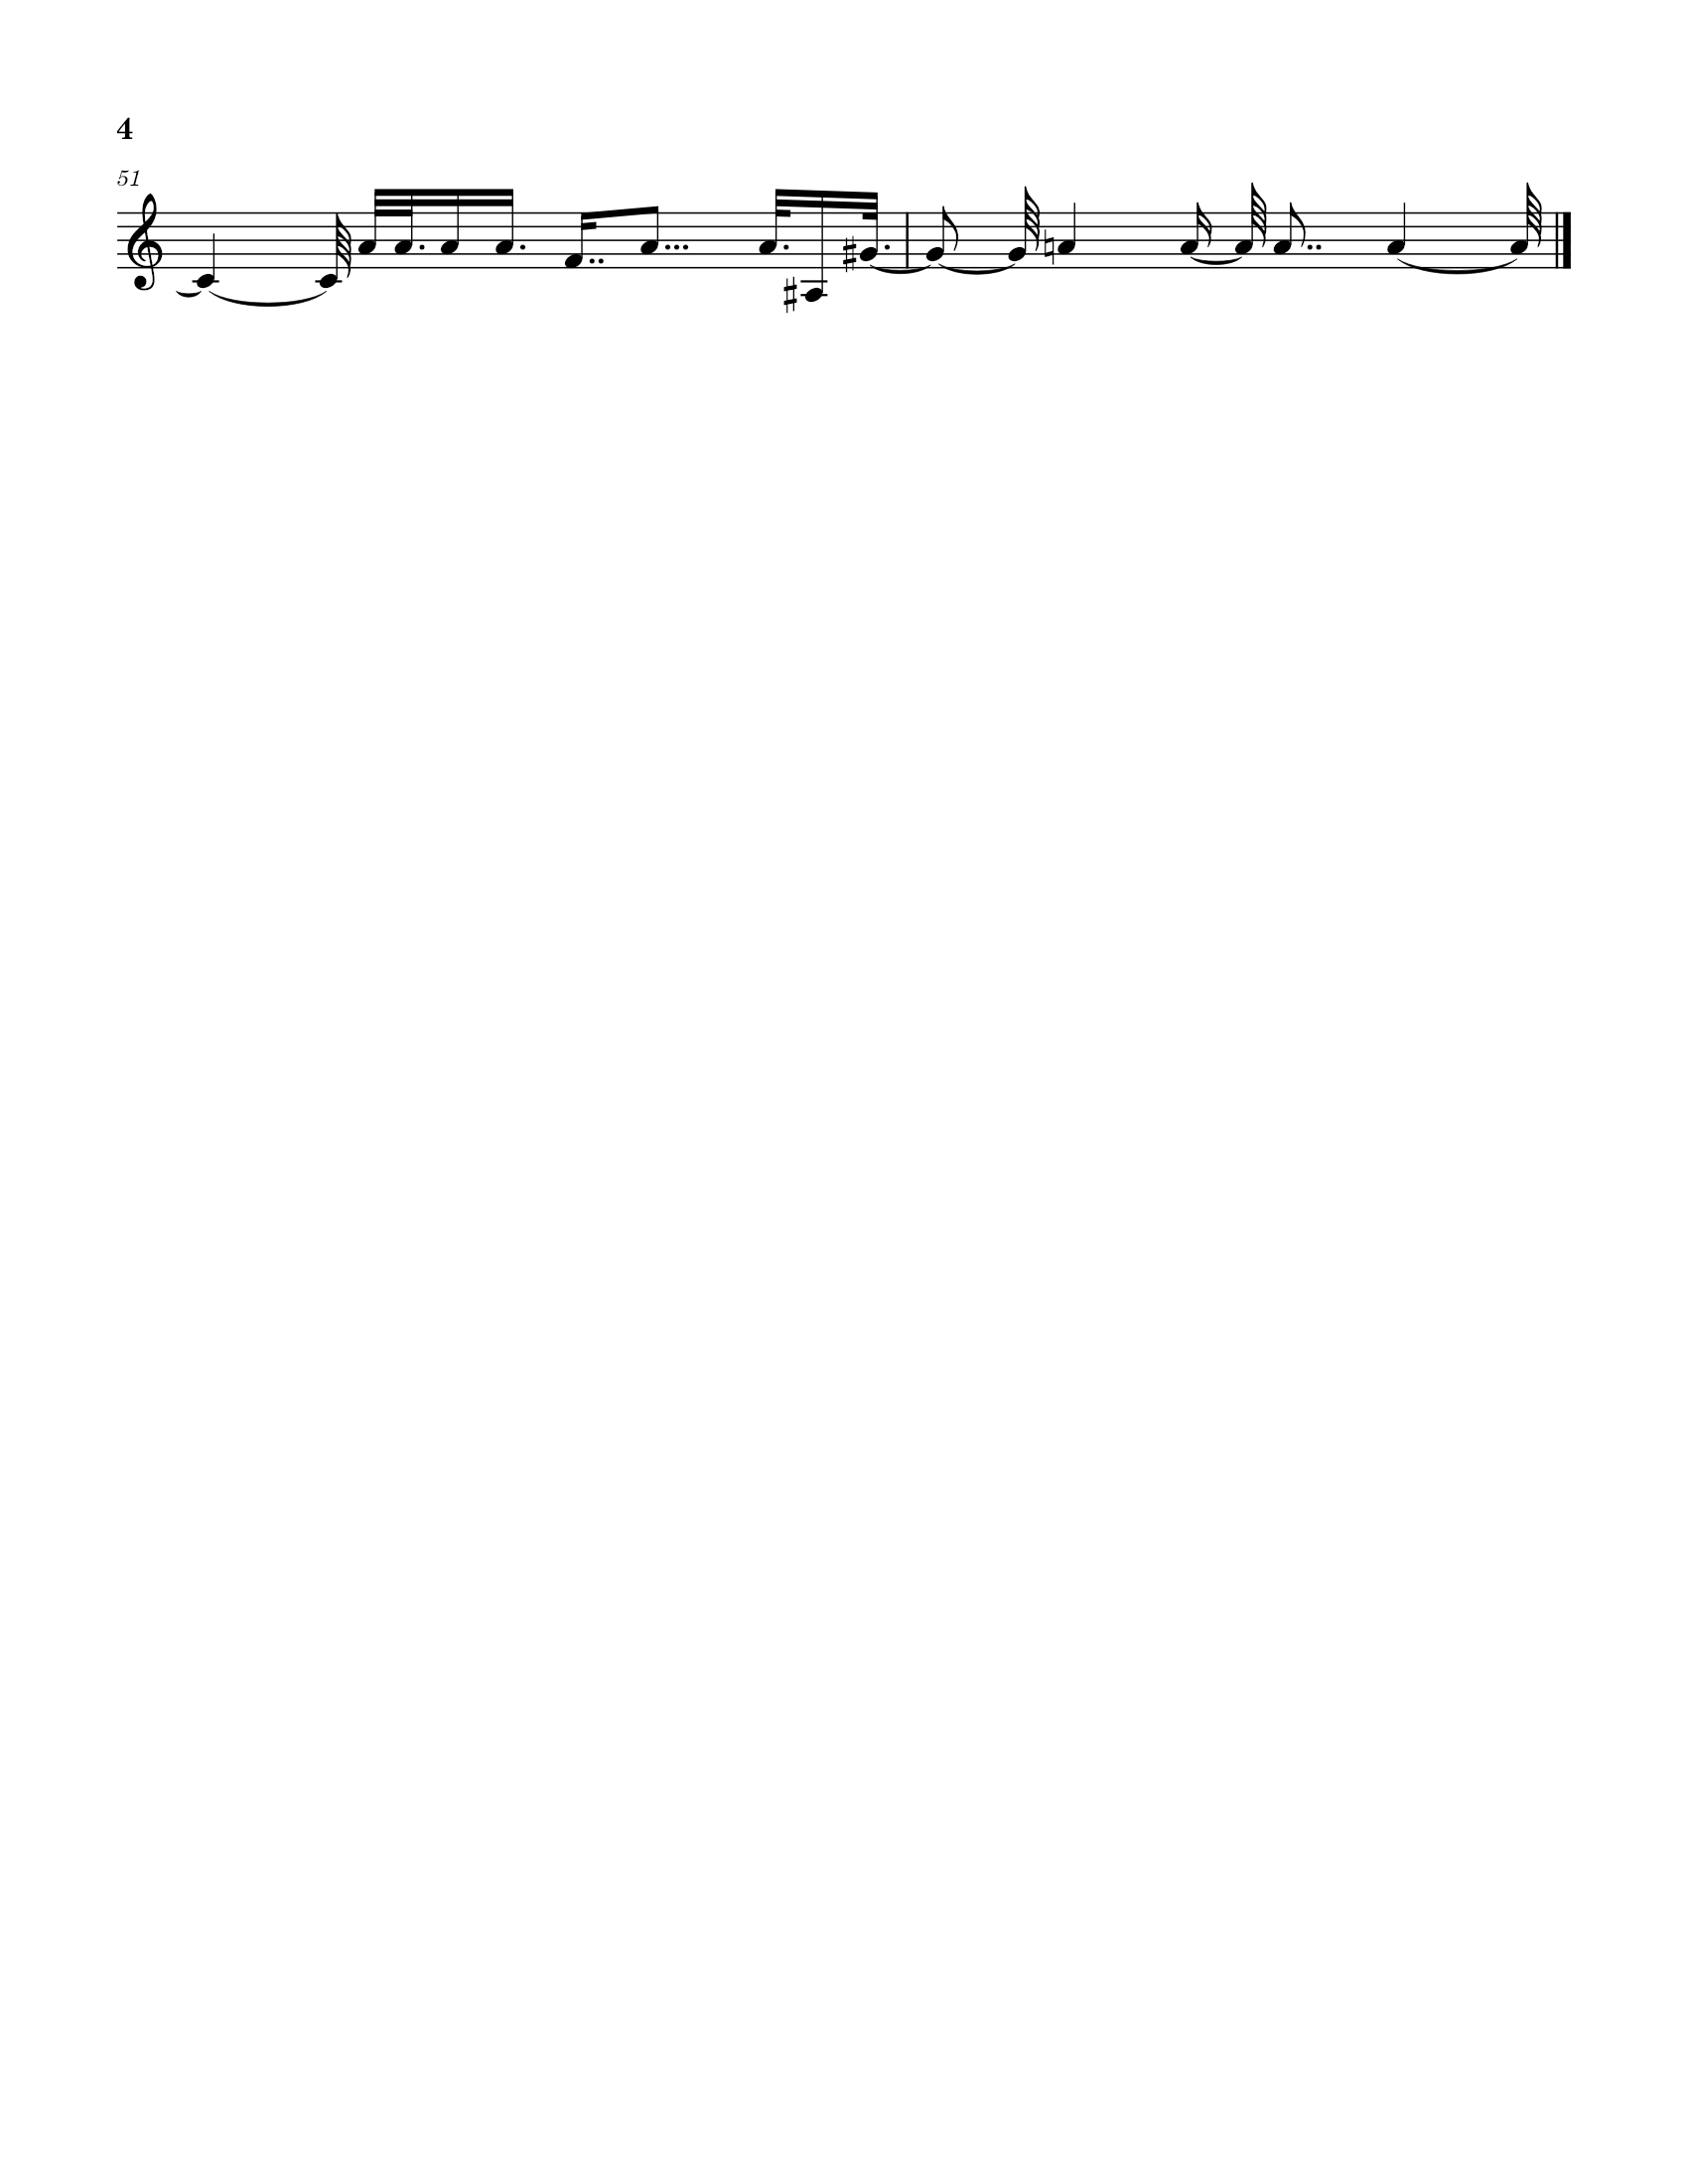

In [34]:
from music21 import stream, meter, note, tempo

# Function to convert a note name to a music21 note object
def note_name_to_object(note_name, duration):
    return note.Note(note_name, quarterLength=duration)

# Function to round duration to the nearest subdivision
def round_duration(duration, subdivision=16):
    return round(duration * subdivision) / subdivision

# Function to create a leadsheet from the onset results
def create_leadsheet(onset_results):
    # Create a stream for the leadsheet
    leadsheet_stream = stream.Score()

    # Add metadata to the leadsheet
    leadsheet_stream.metadata = {
        'title': 'Generated Leadsheet',
        'composer': 'Your Name'
    }

    # Create a part for the leadsheet
    part = stream.Part()

    # Add time signature and tempo
    part.append(meter.TimeSignature('4/4'))
    part.append(tempo.MetronomeMark(number=120))  # Adjust the tempo as needed

    # Iterate over onset results and add notes to the part
    for result in onset_results:
        # Round the duration to the nearest subdivision
        rounded_duration = round_duration(result['duration'])
        note_obj = note_name_to_object(result['detected_note'], rounded_duration)
        part.append(note_obj)

    # Add the part to the leadsheet stream
    leadsheet_stream.append(part)

    return leadsheet_stream

# Create leadsheet from onset results
leadsheet = create_leadsheet(onset_results)

# Show or save the leadsheet
leadsheet.show()
leadsheet.show('musicxml')
# leadsheet.write('musicxml', 'output_leadsheet.xml')  # Uncomment to save as MusicXML
